   Record ID Aircraft: Type                Airport: Name Altitude bin  \
0     202152       Airplane                 LAGUARDIA NY    > 1000 ft   
1     208159       Airplane  DALLAS/FORT WORTH INTL ARPT    < 1000 ft   
2     207601       Airplane            LAKEFRONT AIRPORT    < 1000 ft   
3     215953       Airplane          SEATTLE-TACOMA INTL    < 1000 ft   
4     219878       Airplane                 NORFOLK INTL    < 1000 ft   

  Aircraft: Make/Model Wildlife: Number struck  \
0            B-737-400                Over 100   
1                MD-80                Over 100   
2                C-500                Over 100   
3            B-737-400                Over 100   
4         CL-RJ100/200                Over 100   

   Wildlife: Number Struck Actual Effect: Impact to flight     FlightDate  \
0                           859.0         Engine Shut Down  11/23/00 0:00   
1                           424.0                      NaN   7/25/01 0:00   
2                           2

<ipython-input-1-9c7d62ec9aa3>:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['FlightDate'] = pd.to_datetime(data['FlightDate'], errors='coerce')


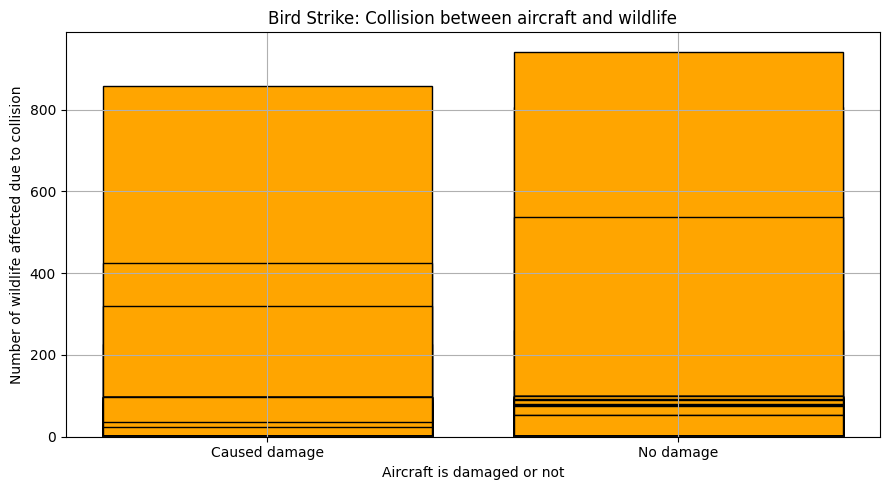


Counts of 'Effect: Indicated Damage':
Effect: Indicated Damage
No damage        14374
Caused damage     1803
Name: count, dtype: int64

Number of bird strikes:
Record ID
202152    1
231134    1
227226    1
230799    1
224138    1
         ..
208829    1
203753    1
203633    1
200888    1
253848    1
Name: count, Length: 16178, dtype: int64


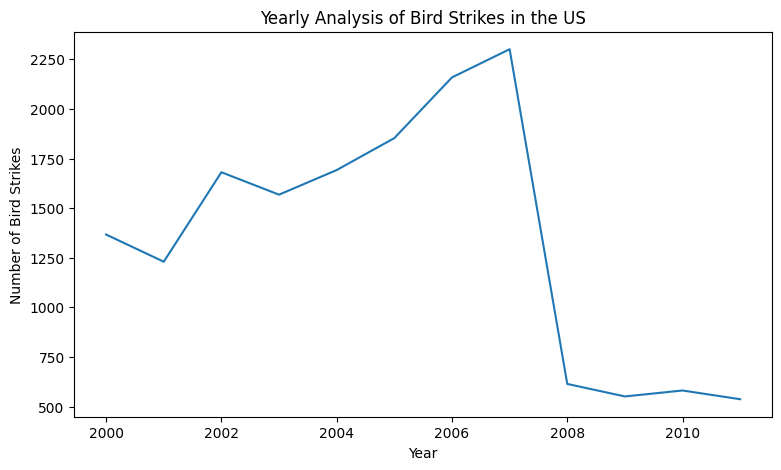

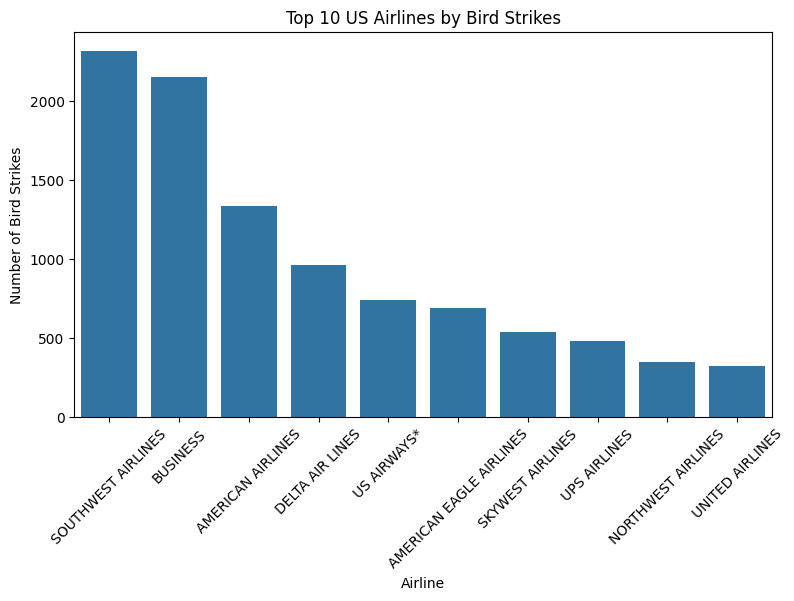

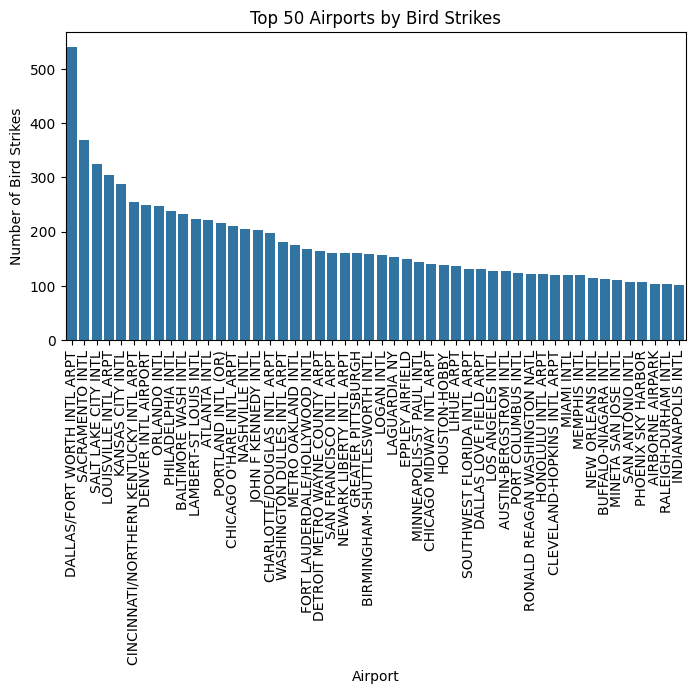

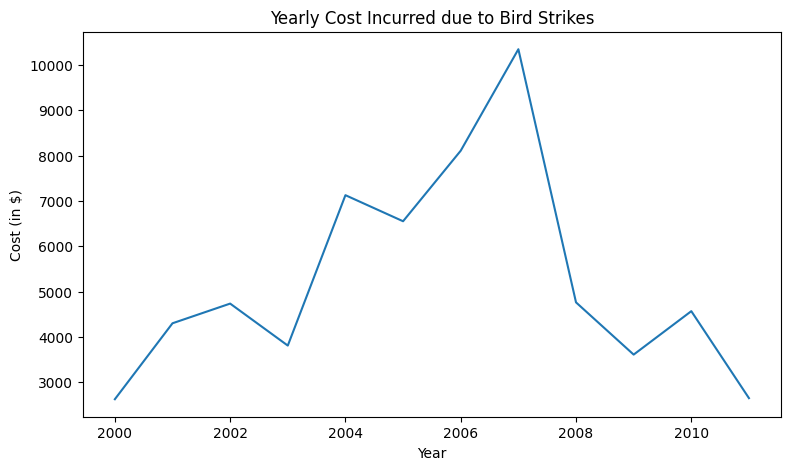

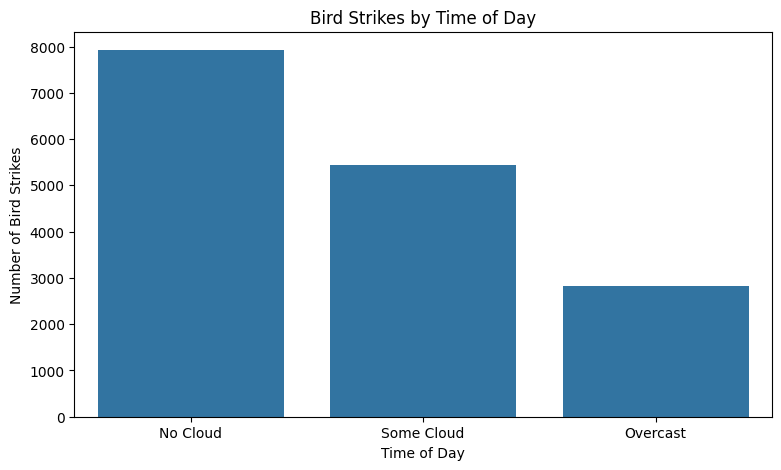

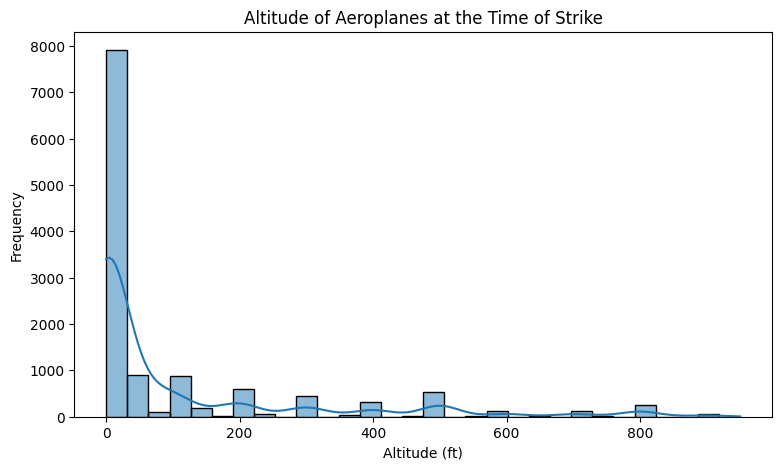

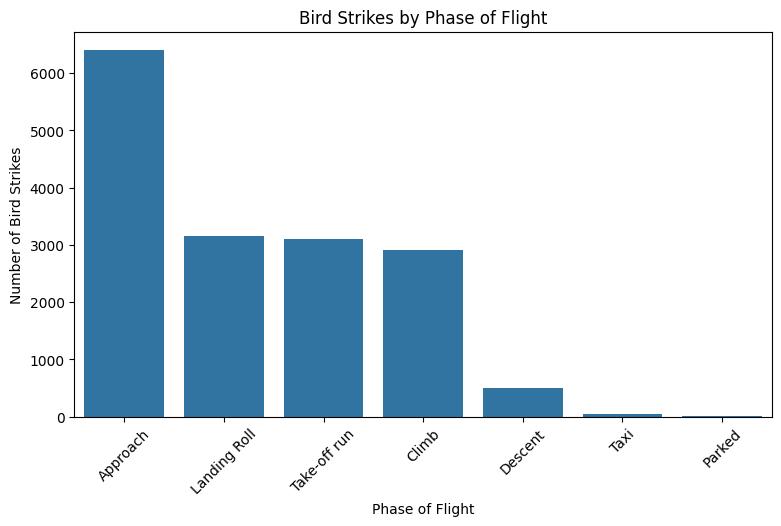

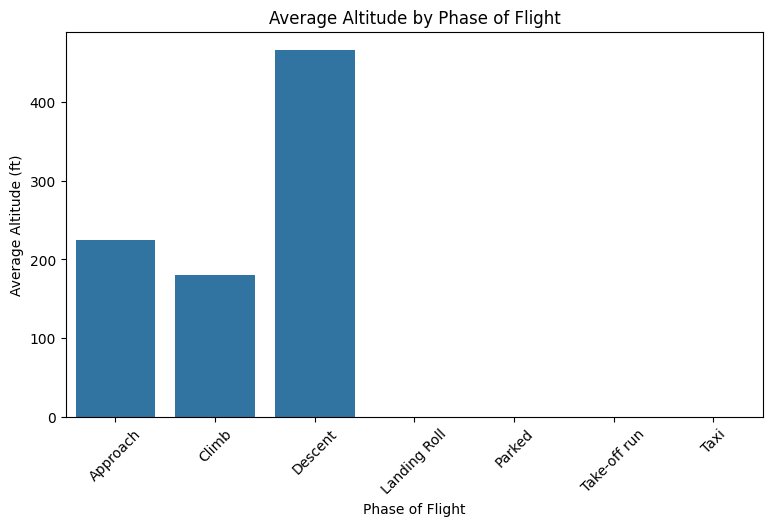

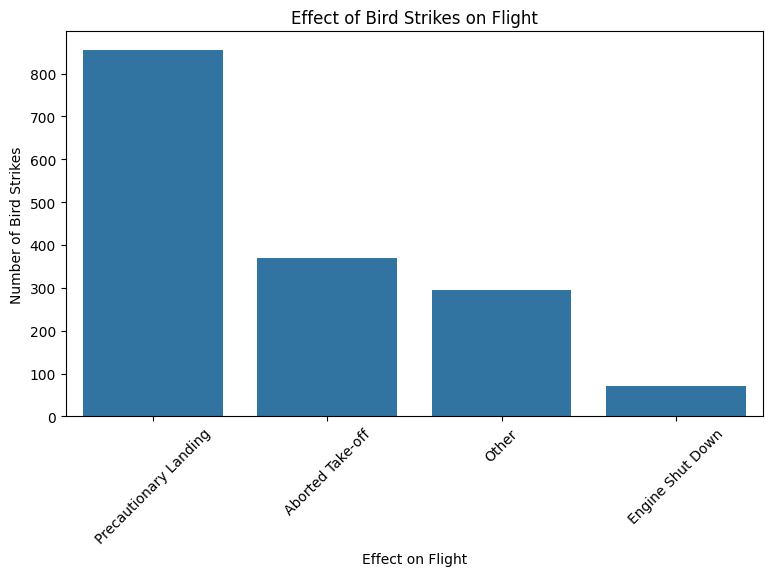

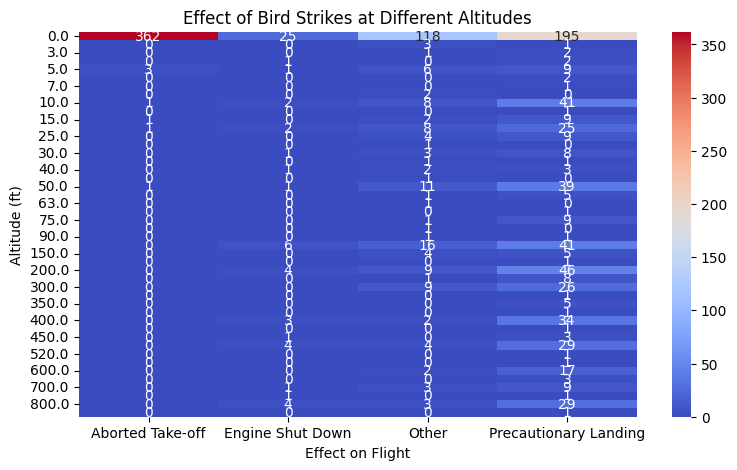

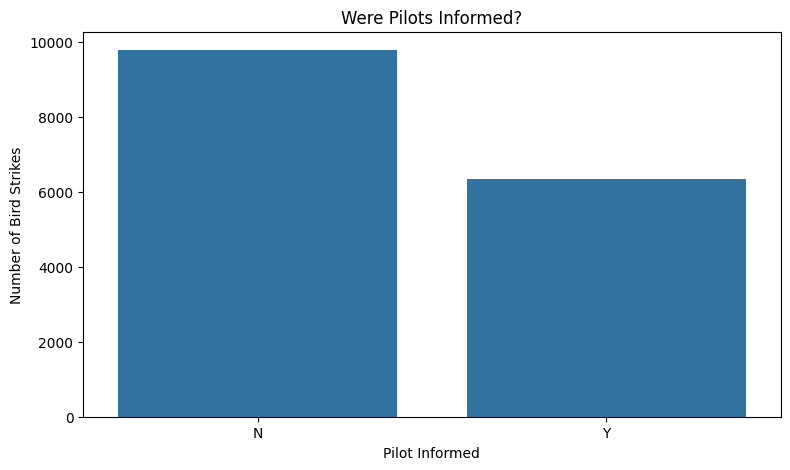

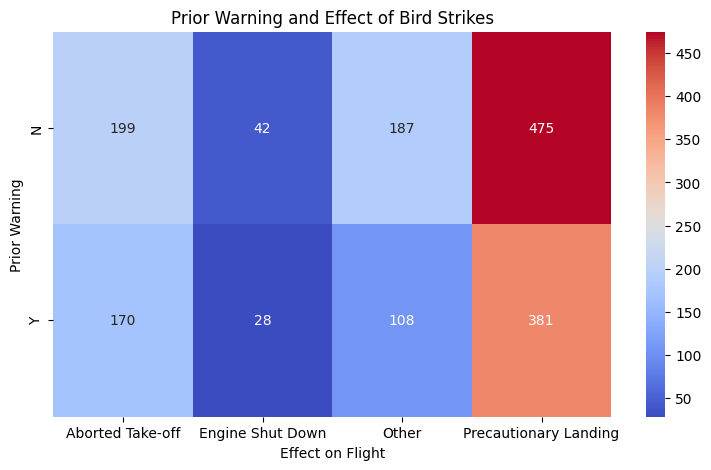

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
data = pd.read_csv("/content/Bird Strikes data.xlsx - Bird Strikes.csv")

# Display the first few rows, information, and summary statistics
print(data.head())
print(data.info())
print(data.describe())
print(data.isnull().sum())

# Convert FlightDate to datetime and extract year
data['FlightDate'] = pd.to_datetime(data['FlightDate'], errors='coerce')
data['Year'] = data['FlightDate'].dt.year

# Convert 'Feet above ground' and 'Cost: Total $' to numeric, coercing errors
data['Feet above ground'] = pd.to_numeric(data['Feet above ground'], errors='coerce')
data['Cost: Total $'] = pd.to_numeric(data['Cost: Total $'], errors='coerce')

# 1. Visuals Depicting the Number of Bird Strikes
# Plot Bird Strike: Collision between aircraft and wildlife
plt.figure(figsize=(9, 5))
plt.bar(data['Effect: Indicated Damage'].astype(str), data['Wildlife: Number Struck Actual'], color='orange', edgecolor='k')
plt.xlabel("Aircraft is damaged or not")
plt.ylabel("Number of wildlife affected due to collision")
plt.title("Bird Strike: Collision between aircraft and wildlife")
plt.tight_layout()
plt.grid()
plt.show()

# Print counts of 'Effect: Indicated Damage'
effect_damage_counts = data['Effect: Indicated Damage'].value_counts()
print("\nCounts of 'Effect: Indicated Damage':")
print(effect_damage_counts)

# Print counts of bird strikes
bird_strikes_counts = data['Record ID'].value_counts()
print("\nNumber of bird strikes:")
print(bird_strikes_counts)

# 2. Yearly Analysis of Bird Strikes in the US
if 'Year' in data.columns:
    yearly_data = data.groupby('Year')['Record ID'].count()
    plt.figure(figsize=(9, 5))
    sns.lineplot(x=yearly_data.index, y=yearly_data.values)
    plt.title('Yearly Analysis of Bird Strikes in the US')
    plt.xlabel('Year')
    plt.ylabel('Number of Bird Strikes')
    plt.show()
else:
    print("Column 'Year' not found in the dataset.")

# 3. Top 10 US Airlines in terms of having encountered bird strikes
if 'Aircraft: Airline/Operator' in data.columns:
    airline_data = data['Aircraft: Airline/Operator'].value_counts().head(10)
    plt.figure(figsize=(9, 5))
    sns.barplot(x=airline_data.index, y=airline_data.values)
    plt.title('Top 10 US Airlines by Bird Strikes')
    plt.xlabel('Airline')
    plt.ylabel('Number of Bird Strikes')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Column 'Aircraft: Airline/Operator' not found in the dataset.")

# 4. Airports with most incidents of bird strikes – Top 50
if 'Airport: Name' in data.columns:
    airport_data = data['Airport: Name'].value_counts().head(50)
    plt.figure(figsize=(8, 4))
    sns.barplot(x=airport_data.index, y=airport_data.values)
    plt.title('Top 50 Airports by Bird Strikes')
    plt.xlabel('Airport')
    plt.ylabel('Number of Bird Strikes')
    plt.xticks(rotation=90)
    plt.show()
else:
    print("Column 'Airport: Name' not found in the dataset.")

# 5. Yearly Cost Incurred due to Bird Strikes
if 'Cost: Total $' in data.columns:
    cost_data = data.groupby('Year')['Cost: Total $'].sum()
    plt.figure(figsize=(9, 5))
    sns.lineplot(x=cost_data.index, y=cost_data.values)
    plt.title('Yearly Cost Incurred due to Bird Strikes')
    plt.xlabel('Year')
    plt.ylabel('Cost (in $)')
    plt.show()
else:
    print("Column 'Cost: Total $' not found in the dataset.")

# 6. When do most bird strikes occur?
if 'Conditions: Sky' in data.columns:
    time_of_day_data = data['Conditions: Sky'].value_counts()
    plt.figure(figsize=(9, 5))
    sns.barplot(x=time_of_day_data.index, y=time_of_day_data.values)
    plt.title('Bird Strikes by Time of Day')
    plt.xlabel('Time of Day')
    plt.ylabel('Number of Bird Strikes')
    plt.show()
else:
    print("Column 'Conditions: Sky' not found in the dataset.")

# 7. Altitude of aeroplanes at the time of strike
if 'Feet above ground' in data.columns:
    altitude_data = data['Feet above ground'].dropna()
    plt.figure(figsize=(9, 5))
    sns.histplot(altitude_data, bins=30, kde=True)
    plt.title('Altitude of Aeroplanes at the Time of Strike')
    plt.xlabel('Altitude (ft)')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Column 'Feet above ground' not found in the dataset.")

# 8. Phase of flight at the time of the strike
if 'When: Phase of flight' in data.columns:
    phase_of_flight_data = data['When: Phase of flight'].value_counts()
    plt.figure(figsize=(9, 5))
    sns.barplot(x=phase_of_flight_data.index, y=phase_of_flight_data.values)
    plt.title('Bird Strikes by Phase of Flight')
    plt.xlabel('Phase of Flight')
    plt.ylabel('Number of Bird Strikes')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Column 'When: Phase of flight' not found in the dataset.")

# 9. Average Altitude of the aeroplanes in different phases at the time of strike
if 'When: Phase of flight' in data.columns and 'Feet above ground' in data.columns:
    avg_altitude_phase_data = data.groupby('When: Phase of flight')['Feet above ground'].mean().dropna()
    plt.figure(figsize=(9, 5))
    sns.barplot(x=avg_altitude_phase_data.index, y=avg_altitude_phase_data.values)
    plt.title('Average Altitude by Phase of Flight')
    plt.xlabel('Phase of Flight')
    plt.ylabel('Average Altitude (ft)')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Columns 'When: Phase of flight' or 'Feet above ground' not found in the dataset.")

# 10. Effect of Bird Strikes & Impact on Flight
if 'Effect: Impact to flight' in data.columns:
    effect_data = data['Effect: Impact to flight'].value_counts()
    plt.figure(figsize=(9, 5))
    sns.barplot(x=effect_data.index, y=effect_data.values)
    plt.title('Effect of Bird Strikes on Flight')
    plt.xlabel('Effect on Flight')
    plt.ylabel('Number of Bird Strikes')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Column 'Effect: Impact to flight' not found in the dataset.")

# 11. Effect of Strike at Different Altitude
if 'Feet above ground' in data.columns and 'Effect: Impact to flight' in data.columns:
    altitude_effect_data = data.groupby('Feet above ground')['Effect: Impact to flight'].value_counts().unstack().fillna(0)
    plt.figure(figsize=(9, 5))
    sns.heatmap(altitude_effect_data, cmap='coolwarm', annot=True, fmt='.0f')
    plt.title('Effect of Bird Strikes at Different Altitudes')
    plt.xlabel('Effect on Flight')
    plt.ylabel('Altitude (ft)')
    plt.show()
else:
    print("Columns 'Feet above ground' or 'Effect: Impact to flight' not found in the dataset.")

# 12. Were Pilots Informed? & Prior Warning and Effect of Strike Relation
if 'Pilot warned of birds or wildlife?' in data.columns:
    pilot_informed_data = data['Pilot warned of birds or wildlife?'].value_counts()
    plt.figure(figsize=(9, 5))
    sns.barplot(x=pilot_informed_data.index, y=pilot_informed_data.values)
    plt.title('Were Pilots Informed?')
    plt.xlabel('Pilot Informed')
    plt.ylabel('Number of Bird Strikes')
    plt.show()
else:
    print("Column 'Pilot warned of birds or wildlife?' not found in the dataset.")

# Prior Warning and Effect of Strike Relation
if 'Pilot warned of birds or wildlife?' in data.columns and 'Effect: Impact to flight' in data.columns:
    prior_warning_data = data.groupby('Pilot warned of birds or wildlife?')['Effect: Impact to flight'].value_counts().unstack().fillna(0)
    plt.figure(figsize=(9, 5))
    sns.heatmap(prior_warning_data, cmap='coolwarm', annot=True, fmt='.0f')
    plt.title('Prior Warning and Effect of Bird Strikes')
    plt.xlabel('Effect on Flight')
    plt.ylabel('Prior Warning')
    plt.show()
else:
    print("Columns 'Pilot warned of birds or wildlife?' or 'Effect: Impact to flight' not found in the dataset.")
